# **World Happiness Report Project**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Retrive the dataset using the raw address
url = 'happiness_score_dataset.csv'
df = pd.read_csv(url)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# EDA Exploratory Data Analysis

In [3]:
df.shape

(158, 12)

In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [7]:
df.columns = ['country',
             'region',
             'happiness_rank',
             'happiness_score',
             'standard_error',
             'gdp_per_capita',
             'family',
             'health',
             'freedom',
             'govt_trust',
             'generosity',
             'dystopia_residual']
df.head()

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,family,health,freedom,govt_trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            158 non-null    object 
 1   region             158 non-null    object 
 2   happiness_rank     158 non-null    int64  
 3   happiness_score    158 non-null    float64
 4   standard_error     158 non-null    float64
 5   gdp_per_capita     158 non-null    float64
 6   family             158 non-null    float64
 7   health             158 non-null    float64
 8   freedom            158 non-null    float64
 9   govt_trust         158 non-null    float64
 10  generosity         158 non-null    float64
 11  dystopia_residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [9]:
#checking missing values
df.isnull().sum()

country              0
region               0
happiness_rank       0
happiness_score      0
standard_error       0
gdp_per_capita       0
family               0
health               0
freedom              0
govt_trust           0
generosity           0
dystopia_residual    0
dtype: int64

<Axes: >

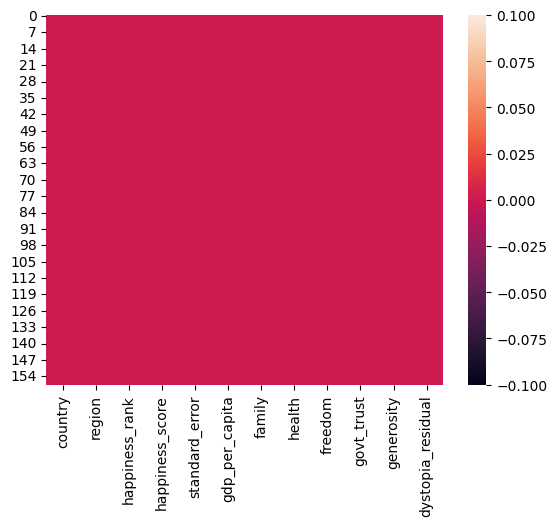

In [10]:
sns.heatmap(df.isnull())

In [11]:
# unique values
udf = df.nunique()
udf['type'] = df.dtypes.values
udf

country                                                            158
region                                                              10
happiness_rank                                                     157
happiness_score                                                    157
standard_error                                                     153
gdp_per_capita                                                     158
family                                                             158
health                                                             157
freedom                                                            158
govt_trust                                                         157
generosity                                                         158
dystopia_residual                                                  158
type                 [object, object, int64, float64, float64, floa...
dtype: object

In [12]:
df['region'].value_counts()

region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [13]:
df

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,family,health,freedom,govt_trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [14]:
df.shape

(158, 12)

In [15]:
df.describe()

,happiness_rank,happiness_score,standard_error,gdp_per_capita,family,health,freedom,govt_trust,generosity,dystopia_residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [16]:
df.describe(exclude=[np.number])

,country,region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


In [17]:
# Numerical and Categorical columns
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(f"Categorical Columns: {cat_col}")
print(f"Numerical Columns: {num_col}")

Categorical Columns: ['country', 'region']
Numerical Columns: ['happiness_rank', 'happiness_score', 'standard_error', 'gdp_per_capita', 'family', 'health', 'freedom', 'govt_trust', 'generosity', 'dystopia_residual']


In [18]:
import matplotlib as plt

In [19]:
num_col.remove('happiness_score')
num_col

['happiness_rank',
 'standard_error',
 'gdp_per_capita',
 'family',
 'health',
 'freedom',
 'govt_trust',
 'generosity',
 'dystopia_residual']

In [20]:
region_count = df['region'].value_counts().to_frame()
region_count

,count
region,
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
North America,2


# Data visualization

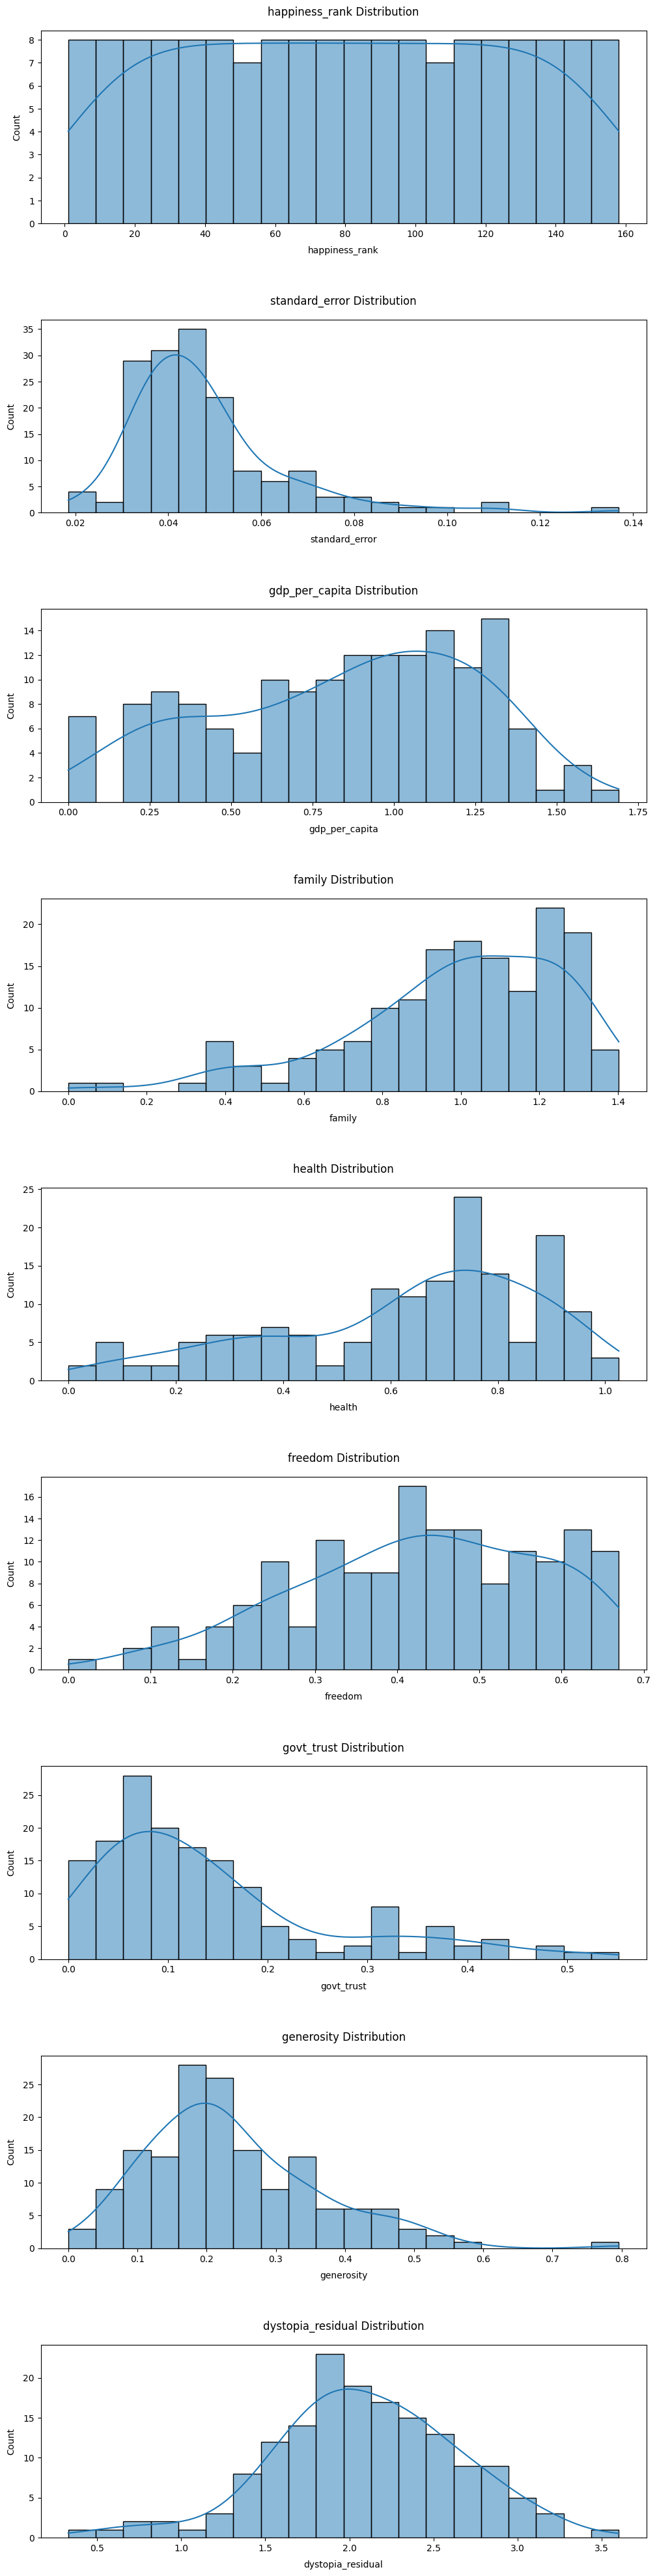

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

rows = len(num_col)
fig, axes = plt.subplots(rows, 1, figsize=(12, 50))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"{col} Distribution", size=12, y=1.05)
    axes[i].set_xlabel(col, size=10, labelpad=8)
    axes[i].set_ylabel('Count', size=10, labelpad=8)

plt.show()

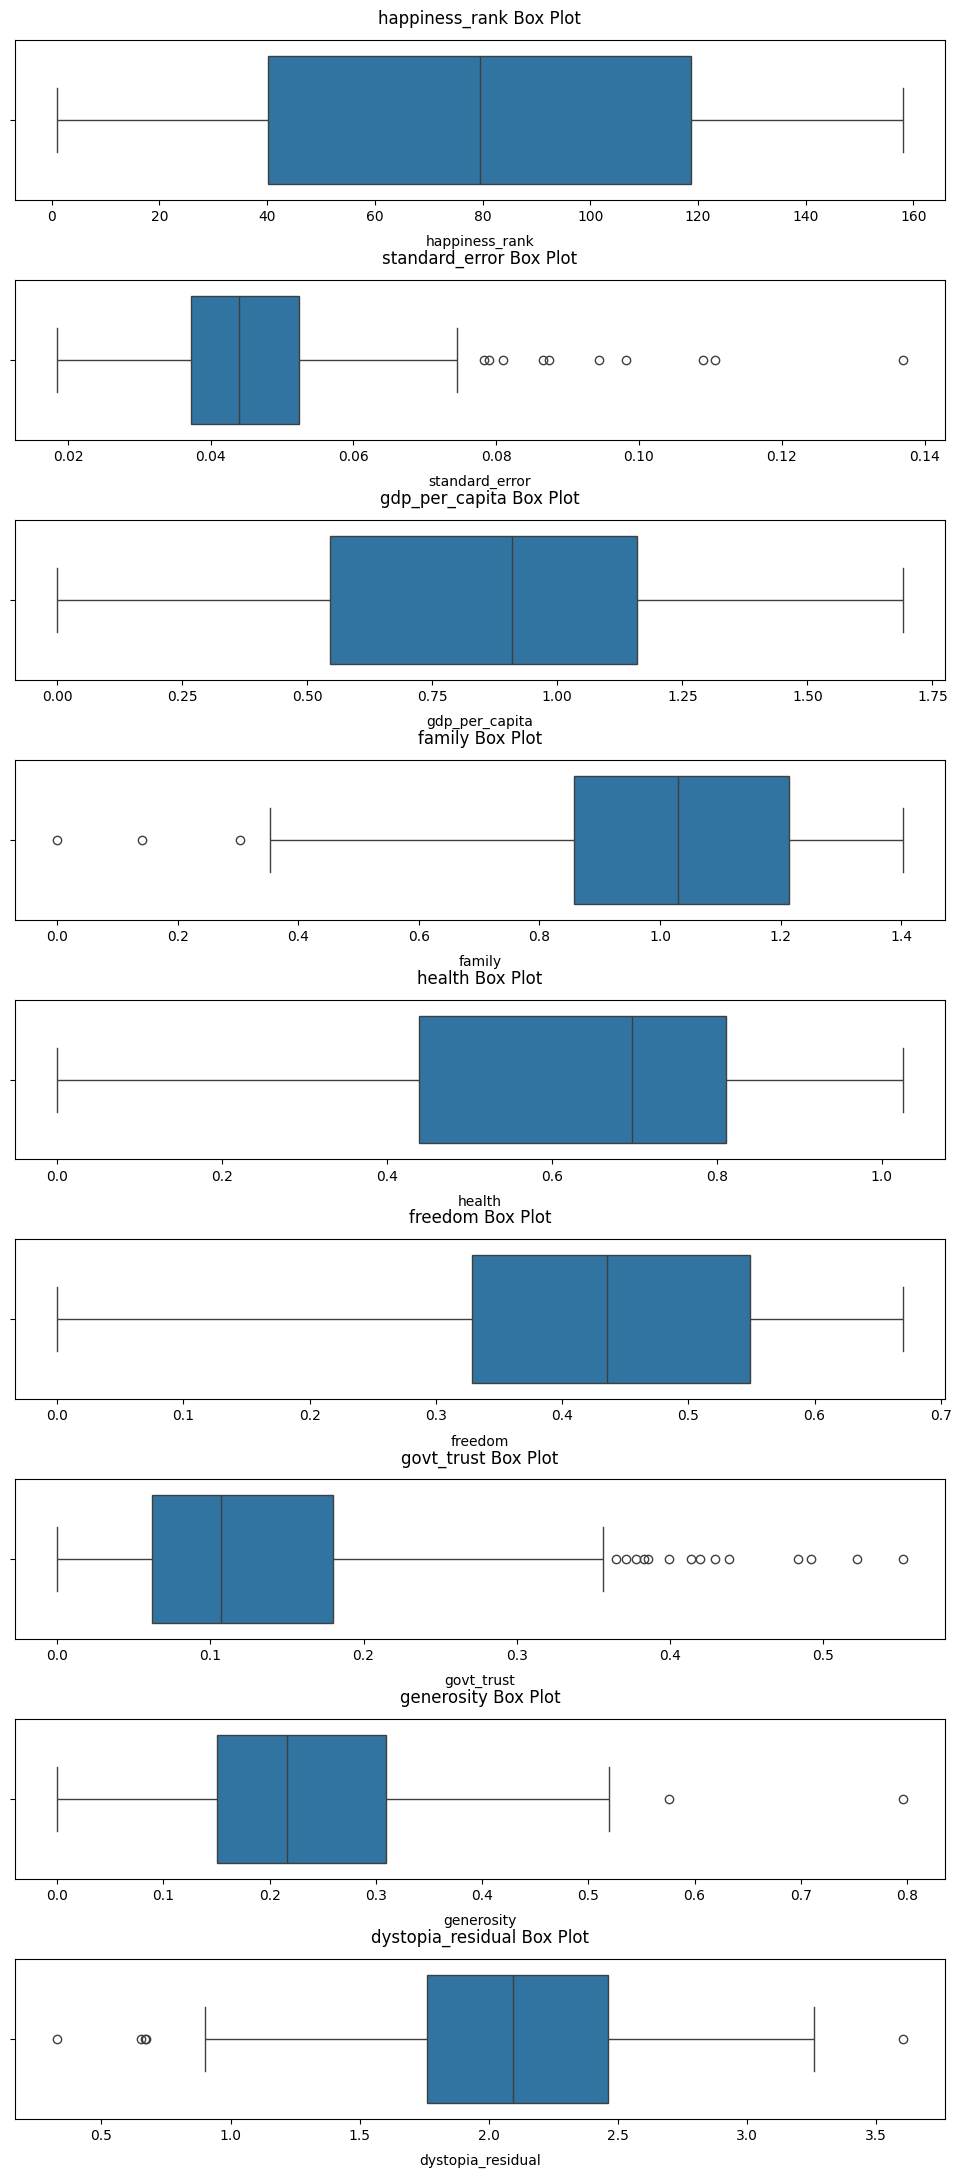

In [22]:
fig, axes = plt.subplots(rows, 1, figsize=(12, rows * 3))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} Box Plot", size=12, y=1.05)
    axes[i].set_xlabel(col, size=10, labelpad=8)
    axes[i].set_ylabel('', size=10, labelpad=8)

plt.show()

In [23]:
(df.groupby('region')['happiness_score'].mean().sort_values(ascending=False)).to_frame()

,happiness_score
region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.332931
Southeastern Asia,5.317444
Southern Asia,4.580857


In [24]:
df.drop('country', axis=1, inplace=True)

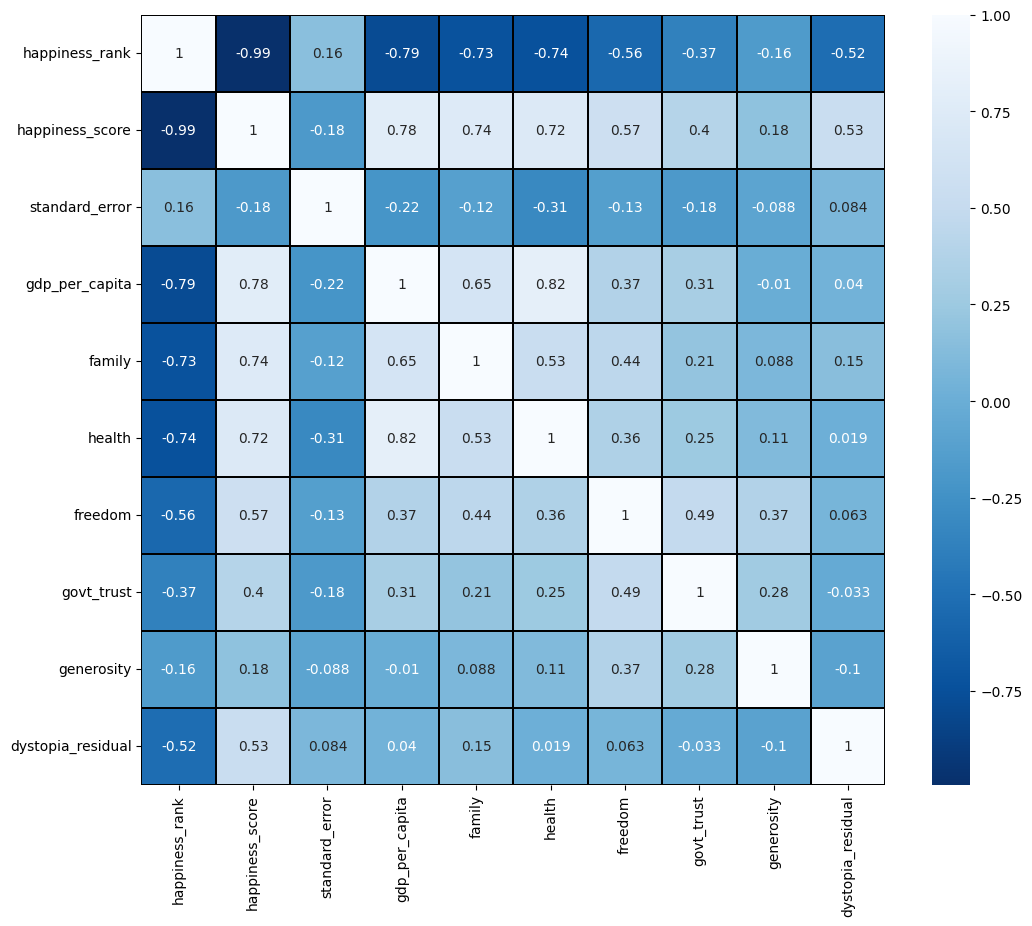

In [25]:
df_numeric = df.drop(columns=['region'])

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), linewidths=0.1, fmt=".2g", linecolor='black', annot=True, cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [26]:
df_numeric = df.drop(columns=['region'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Sort the correlation values for 'happiness_score' in descending order
sorted_correlations = correlation_matrix['happiness_score'].sort_values(ascending=False)

# Print the sorted correlations
print("Sorted Correlation Values for 'happiness_score':")
print(sorted_correlations)

Sorted Correlation Values for 'happiness_score':
happiness_score      1.000000
gdp_per_capita       0.780966
family               0.740605
health               0.724200
freedom              0.568211
dystopia_residual    0.530474
govt_trust           0.395199
generosity           0.180319
standard_error      -0.177254
happiness_rank      -0.992105
Name: happiness_score, dtype: float64


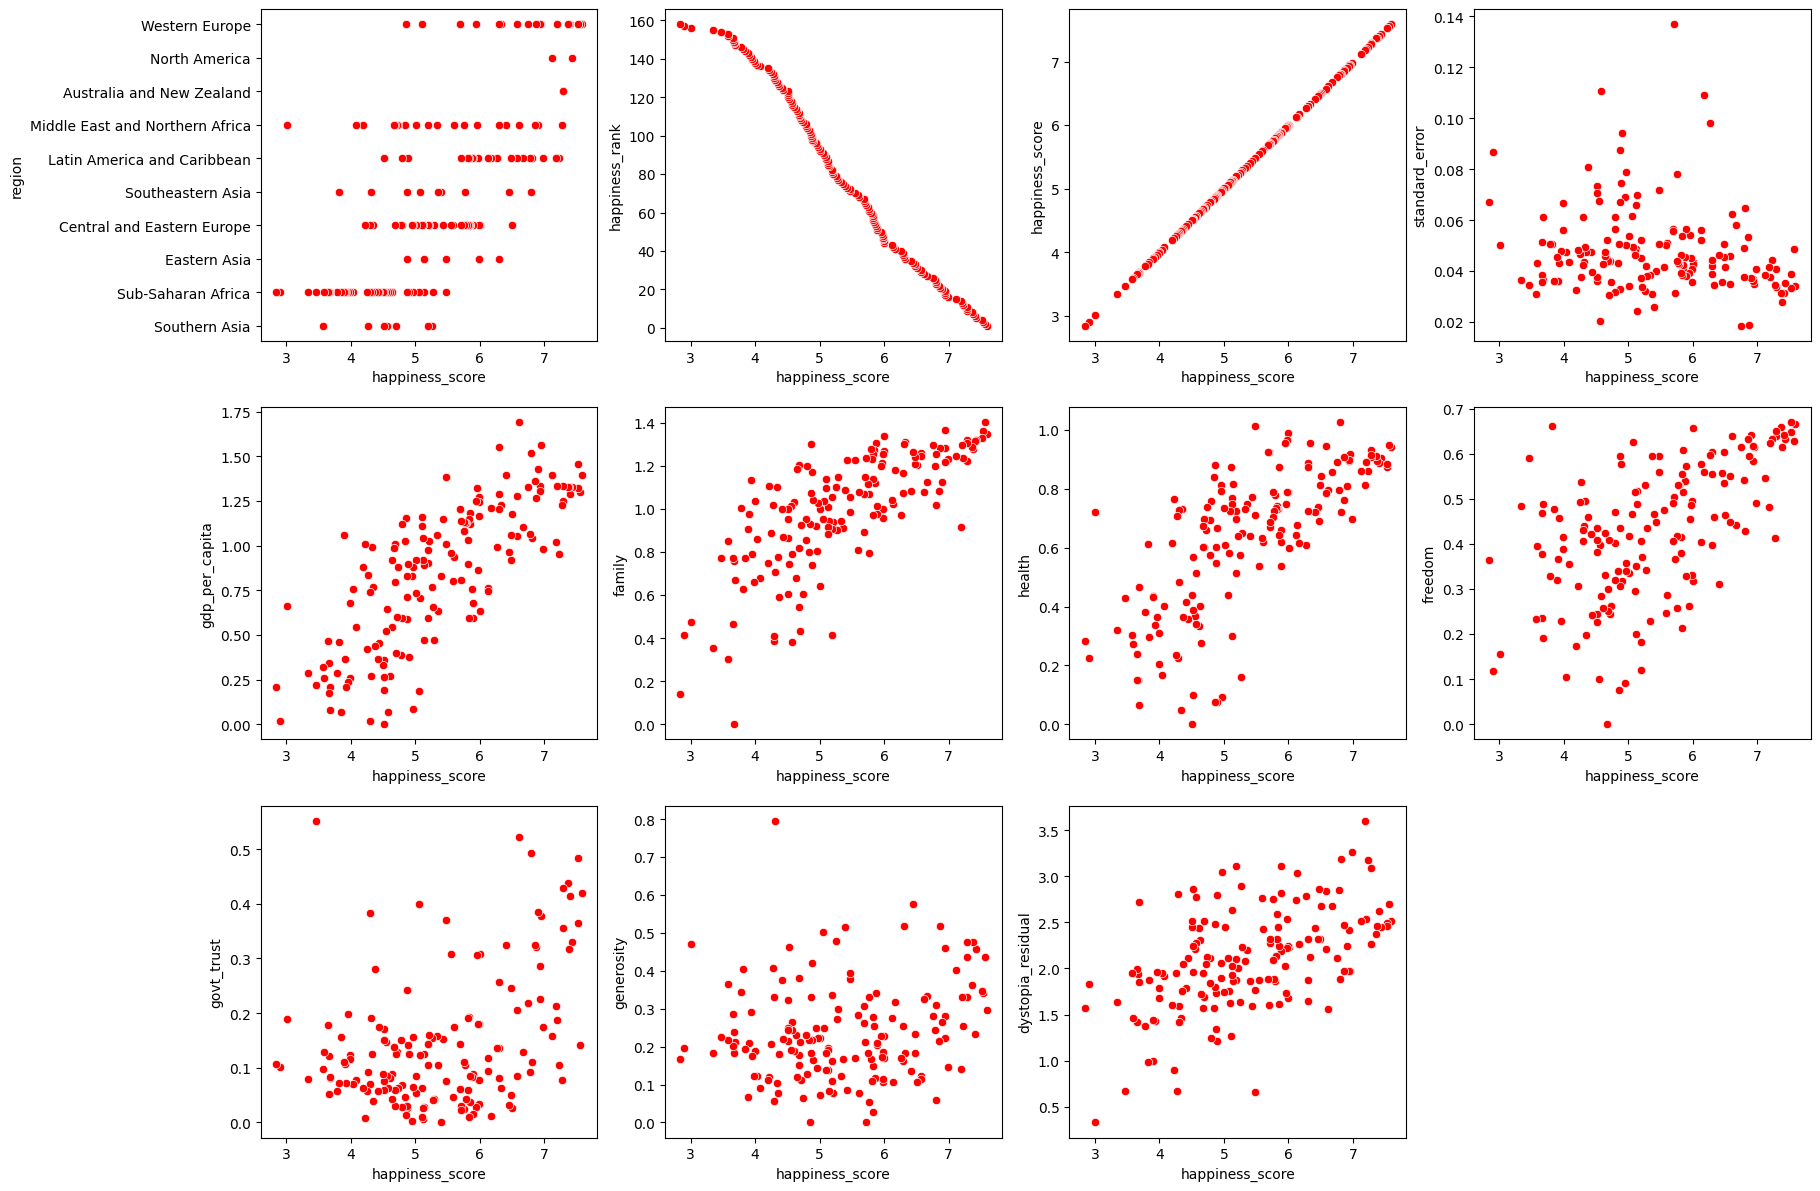

In [27]:
plt.figure(figsize=(20,25))
p=1
for i in df:
  if p<=17:
    plt.subplot(5,4,p)
    sns.scatterplot(x='happiness_score', y=i, data=df, color='r')
    plt.xlabel('happiness_score')
    plt.ylabel(i)
  p+=1
plt.show()

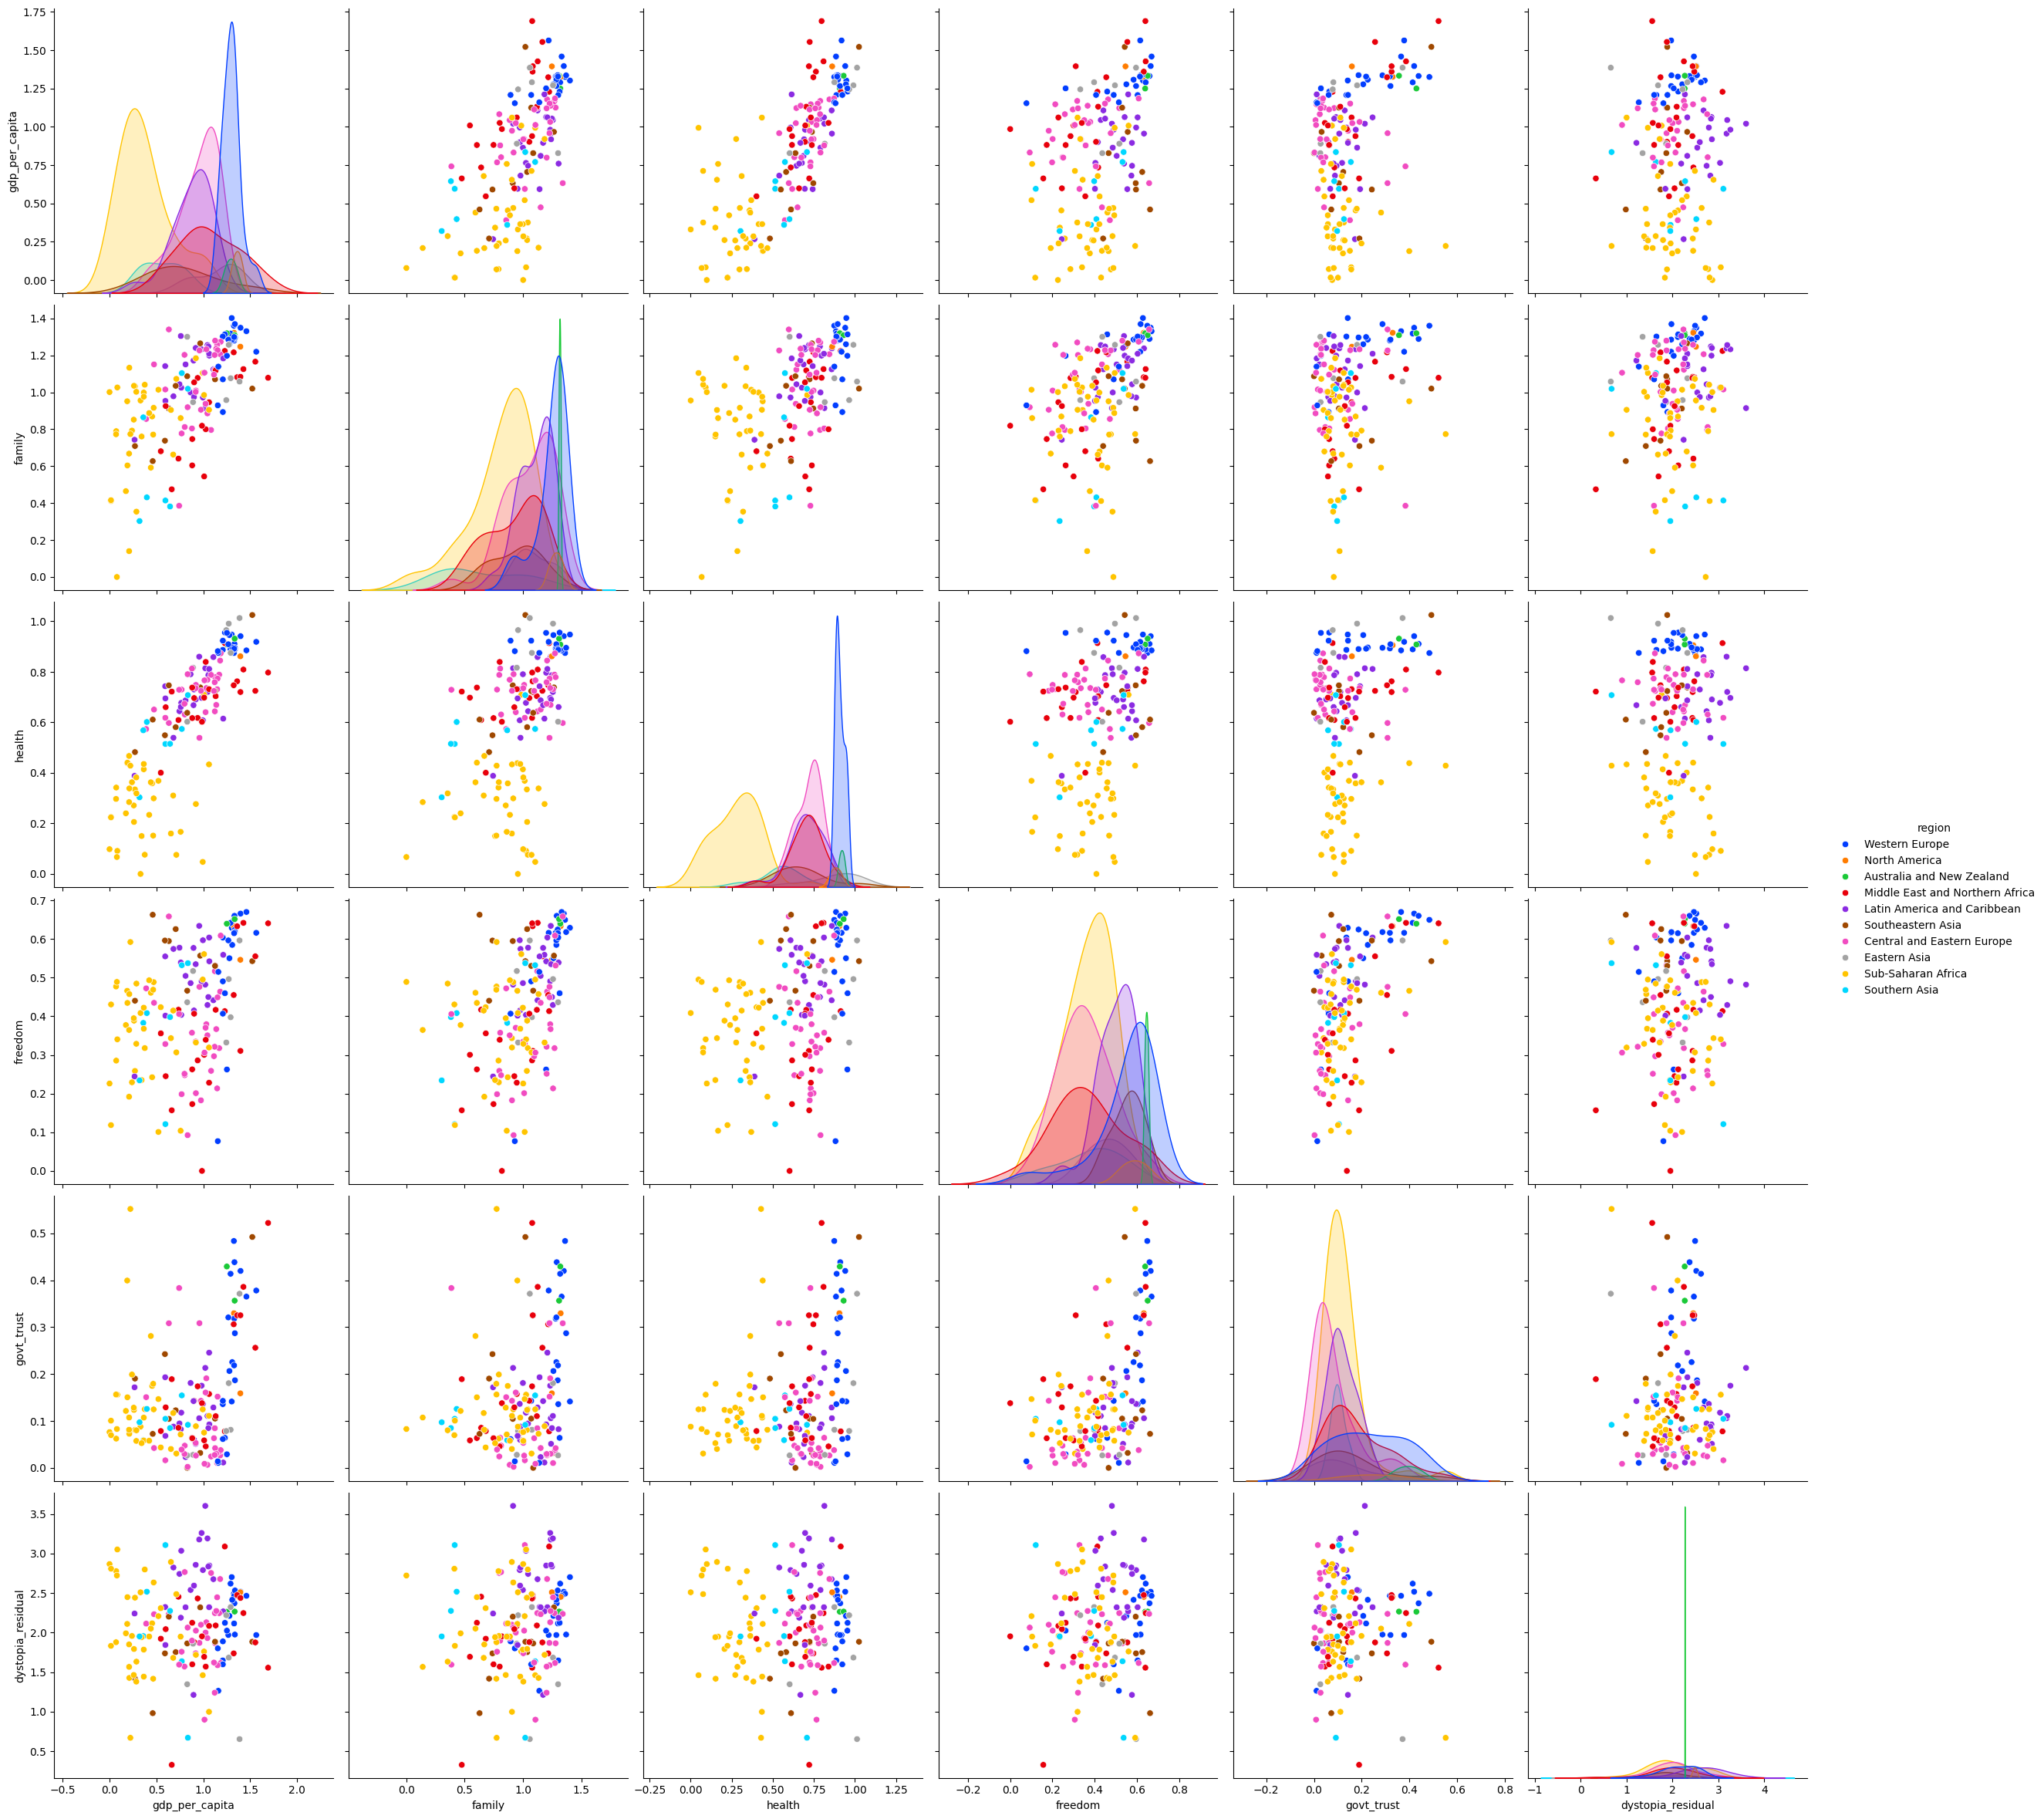

In [28]:
#Understanding the relationship between all the features
g = sns.pairplot(df.drop(['happiness_score','happiness_rank','standard_error','generosity'], axis=1), hue="region", palette='bright', size=4)

plt.show()

In [29]:
features = ['gdp_per_capita', 'health', 'family', 'freedom', 'government_trust', 'dystopia_residual', 'region','happiness_score']

In [30]:
# Remove unnecessary columns
df.drop(['generosity','standard_error'], axis=1, inplace=True)

In [31]:
df.head()

,region,happiness_rank,happiness_score,gdp_per_capita,family,health,freedom,govt_trust,dystopia_residual
0,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176


In [32]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

df['region'] = OE.fit_transform(df['region'].values.reshape(-1, 1))

In [33]:
df.head()

,region,happiness_rank,happiness_score,gdp_per_capita,family,health,freedom,govt_trust,dystopia_residual
0,9.0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,9.0,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,9.0,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,9.0,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,5.0,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176


In [34]:
#SKEWNWSS
df.skew().sort_values(ascending=False)

govt_trust           1.385463
happiness_score      0.097769
happiness_rank       0.000418
region              -0.116119
dystopia_residual   -0.238911
gdp_per_capita      -0.317575
freedom             -0.413462
health              -0.705328
family              -1.006893
dtype: float64

In [35]:
df['govt_trust'] = np.cbrt(df['govt_trust'])

In [36]:
df.skew().sort_values(ascending=False).to_frame()

,0
happiness_score,0.097769
govt_trust,0.011932
happiness_rank,0.000418
region,-0.116119
dystopia_residual,-0.238911
gdp_per_capita,-0.317575
freedom,-0.413462
health,-0.705328
family,-1.006893


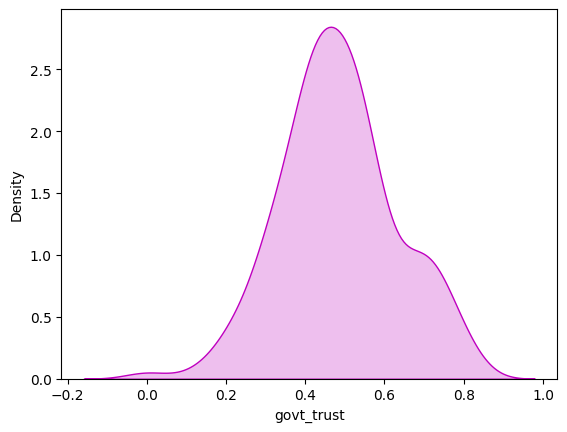

In [37]:
sns.distplot(df['govt_trust'], color = 'm', kde_kws = {"shade": True}, hist = False)
plt.show()

In [39]:
from scipy.stats import zscore

z = np.abs(zscore(df))

df_new = df[(z<3).all(axis=1)]


df = df_new
df

,region,happiness_rank,happiness_score,gdp_per_capita,family,health,freedom,govt_trust,dystopia_residual
0,9.0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.748756,2.51738
1,9.0,2,7.561,1.30232,1.40223,0.94784,0.62877,0.521036,2.70201
2,9.0,3,7.527,1.32548,1.36058,0.87464,0.64938,0.784910,2.49204
3,9.0,4,7.522,1.45900,1.33095,0.88521,0.66973,0.714677,2.46531
4,5.0,5,7.427,1.32629,1.32261,0.90563,0.63297,0.690742,2.45176
...,...,...,...,...,...,...,...,...,...
151,8.0,152,3.587,0.25812,0.85188,0.27125,0.39493,0.504388,1.46494
152,7.0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.459770,1.95210
153,8.0,154,3.465,0.22208,0.77370,0.42864,0.59201,0.820269,0.67042
154,8.0,155,3.340,0.28665,0.35386,0.31910,0.48450,0.431066,1.63328


In [40]:
df.skew()

region              -0.092241
happiness_rank       0.005561
happiness_score      0.156312
gdp_per_capita      -0.338915
family              -0.776524
health              -0.714441
freedom             -0.415506
govt_trust           0.209070
dystopia_residual   -0.104853
dtype: float64

In [43]:
#separating features and labels
x = df.drop(['happiness_score'], axis = 1)
y = df['happiness_score']

In [45]:
#Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,region,happiness_rank,gdp_per_capita,family,health,freedom,govt_trust,dystopia_residual
0,1.304300,-1.713461,1.354616,1.374623,1.256049,1.565589,1.853311,0.757595
1,1.304300,-1.691231,1.118312,1.585431,1.282368,1.320850,0.247161,1.102134
2,1.304300,-1.669000,1.176416,1.418888,0.981816,1.457917,2.108307,0.710308
3,1.304300,-1.646770,1.511392,1.300409,1.025215,1.593255,1.612940,0.660426
4,-0.028119,-1.624540,1.178448,1.267060,1.109058,1.348782,1.444126,0.635141
...,...,...,...,...,...,...,...,...
149,0.971195,1.643306,-1.501382,-0.615212,-1.495650,-0.234309,0.129741,-1.206370
150,0.638090,1.665536,-1.346589,-2.810577,-1.363850,-1.303646,-0.184958,-0.297278
151,0.971195,1.687766,-1.591799,-0.927825,-0.849421,1.076376,2.357698,-2.689029
152,0.971195,1.709996,-1.429806,-2.606607,-1.299182,0.361379,-0.387408,-0.892230


In [46]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF '] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF ', ascending=False)

,Features,VIF
1,happiness_rank,54.439432
7,dystopia_residual,12.768547
2,gdp_per_capita,9.071158
4,health,7.095833
3,family,4.913775
5,freedom,3.405192
6,govt_trust,1.919245
0,region,1.284886


In [47]:
x.drop(['dystopia_residual'], axis=1, inplace=True)

In [48]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF '] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF ', ascending=False)

,Features,VIF
1,happiness_rank,4.386239
2,gdp_per_capita,4.000937
4,health,3.592315
3,family,2.374637
5,freedom,1.866562
6,govt_trust,1.502241
0,region,1.283600


# Modelling

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import PolynomialFeatures

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=145)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (107, 7)
x_test shape:   (47, 7)
y_train shape:  (107,)
y_test shape:   (47,)


Linear Regression

In [55]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR train score % :", lm.score(x_train, y_train)*100)
print("LR test score %  :", lm.score(x_test, y_test)*100)

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


LR train score % : 98.75563151677304
LR test score %  : 98.90193654713886
Mean squared error: 0.0154
Root Mean squared error: 0.1242
Cross-validation results (R2): [-2.32967081  0.78712947  0.12240405 -1.75801143  0.49757965 -0.37266532
  0.16433504 -3.2649787  -0.56391964  0.37047594]
Average R2: -0.6347
R2_Score(test): 0.9890


Decision tree regressor

In [59]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)

print("dtr train score % :", dtr.score(x_train, y_train)*100)
print("dtr test score %  :", dtr.score(x_test, y_test)*100)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(scores.mean())
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

dtr train score % : 100.0
dtr test score %  : 99.27186511474801
Mean squared error: 0.0102
Root Mean squared error: 0.1012
Cross-validation results (R2): [-3.78642835 -0.56602406 -0.13536524 -0.84636536 -2.16777641]
-1.5003918844548796
Average R2: -1.5004
R2_Score(test): 0.9927


In [63]:
RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
# print()
print('R2 score', r2_score(y_test, pred_RFR))
print('R2 score on training data', r2_score(y_train, pred_train)*100)
# print('MAE', mean_absolute_error(y_test, pred_RFR))
print('MSE', mean_squared_error(y_test, pred_RFR))
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_RFR)))

score= cross_val_score(RFR, x,y)
print(score)
print(score.mean())
#print('difference bw r2score and cvscore is', (r2_score(y_test, pred_RFR) - score.mean())*100)

R2 score 0.9979241718544998
R2 score on training data 99.92284823489696
MSE 0.002917600823404163
RMSE 0.0540148204051829
[-3.77629359 -0.46560595 -0.02529914 -0.87610198 -2.49167668]
-1.5269954678477553


Decision tree regressor and Randomforest regressor are the best performing models

In [64]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 1000],  # Corrected syntax
    'max_depth': [0, 10, 20],
    'n_jobs': [-2, -1, 1],
    'n_estimators': [50, 100, 200, 300]
}

In [66]:
gscv=GridSearchCV(DecisionTreeRegressor(), parameters, cv=5)

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state': [10, 50, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Instantiate the DecisionTreeRegressor
model = DecisionTreeRegressor()

# Instantiate GridSearchCV
gscv = GridSearchCV(estimator=model, param_grid=parameters, cv=5)

# Fit the GridSearchCV
gscv.fit(x_train, y_train)

# Print the best parameters
print("Best parameters found: ", gscv.best_params_)

# Print the best score
print("Best score: ", gscv.best_score_)


Best parameters found:  {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10}
Best score:  0.9879955146736463


In [72]:
FinalModel=DecisionTreeRegressor(criterion= 'squared_error', min_samples_leaf=1, min_samples_split= 2, random_state= 10)
FinalModel.fit(x_train, y_train)
pred=FinalModel.predict(x_test)
print(r2_score(y_test, pred)*100, '%')

99.28891349754653 %


In [74]:
#Save the Best Model
import joblib

joblib.dump(FinalModel, 'world_happiness_final_model.pkl')

['world_happiness_final_model.pkl']

In [76]:
# Load the Model for Future Predictions
loaded_model = joblib.load('world_happiness_final_model.pkl')
predictions = loaded_model.predict(x_train)
predictions

array([4.297, 4.686, 6.853, 6.867, 5.212, 4.633, 4.292, 4.369, 4.874,
       5.824, 6.003, 5.709, 7.226, 6.94 , 5.605, 3.904, 6.611, 4.55 ,
       4.518, 6.411, 4.332, 7.587, 5.129, 5.477, 5.995, 4.565, 5.548,
       6.302, 6.983, 5.754, 3.681, 5.813, 5.253, 6.505, 3.995, 6.75 ,
       4.739, 5.984, 4.436, 6.123, 5.791, 3.931, 5.124, 5.89 , 5.474,
       5.123, 5.332, 5.429, 5.057, 4.857, 6.485, 4.571, 4.271, 4.252,
       6.13 , 7.119, 4.033, 3.845, 5.007, 4.517, 4.514, 5.14 , 4.218,
       3.989, 7.522, 5.759, 6.168, 7.2  , 4.786, 5.828, 4.61 , 7.187,
       4.885, 6.946, 4.194, 4.959, 5.975, 6.295, 5.36 , 5.878, 5.695,
       5.948, 5.77 , 2.905, 4.8  , 6.901, 6.81 , 5.689, 3.896, 3.956,
       6.798, 4.077, 3.575, 3.655, 4.681, 4.642, 7.278, 6.574, 4.839,
       6.455, 5.855, 7.286, 5.013, 3.667, 4.419, 4.715, 6.298])